In [67]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
import numpy as np
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from math import sqrt

import matplotlib.pyplot as plt

%matplotlib inline

In [68]:
df = pd.read_csv("weather_flu_google_9.csv")
df.head()

,year,week,total.specimens,percent.positive,cough_medicine,flu_clinic,flu_shot,flu_vaccine,flu,influenza,...,vac_num,vac_effectiveness,all_rate,rate_0_4,rate_5_17,rate_18_49,rate_50_64,rate_65_plus,celcius_median_t,absolute_humidity
0,2010,40,54,0.00,55.12500,120.718085,85.207101,44.615385,17.790698,35.0,...,130.9,60,0.0,0.0,0.0,0.0,0.0,0.0,13.611111,9.417646
1,2010,41,57,1.75,55.12500,165.691489,47.928994,55.384615,20.755814,29.0,...,130.9,60,0.0,0.0,0.0,0.0,0.0,0.0,12.222222,7.021040
2,2010,42,71,1.41,81.15625,80.478723,76.331361,32.307692,16.802326,14.0,...,130.9,60,0.0,0.0,0.0,0.0,0.0,0.0,10.277778,5.831757
3,2010,43,77,2.60,53.59375,89.000000,53.254438,64.615385,14.825581,14.0,...,130.9,60,0.1,0.0,0.0,0.0,0.0,0.4,15.555556,8.617508
4,2010,44,68,0.00,49.00000,78.111702,37.278107,63.076923,14.825581,28.0,...,130.9,60,0.1,0.0,0.0,0.1,0.0,0.0,6.666667,5.231198


In [69]:
df.shape

(418, 30)

In [70]:
df.dtypes

year                   int64
week                   int64
total.specimens        int64
percent.positive     float64
cough_medicine       float64
flu_clinic           float64
flu_shot             float64
flu_vaccine          float64
flu                  float64
influenza            float64
oseltamivir          float64
relenza              float64
tamiflu              float64
zanamivir              int64
flu_symptoms         float64
median_tmax          float64
median_tmin          float64
median_t             float64
total_prcp           float64
humidity             float64
vac_num              float64
vac_effectiveness      int64
all_rate             float64
rate_0_4             float64
rate_5_17            float64
rate_18_49           float64
rate_50_64           float64
rate_65_plus         float64
celcius_median_t     float64
absolute_humidity    float64
dtype: object

In [71]:
df['num_cases'] = df['total.specimens'] * 0.01 * df['percent.positive']

In [72]:
df.dtypes

year                   int64
week                   int64
total.specimens        int64
percent.positive     float64
cough_medicine       float64
flu_clinic           float64
flu_shot             float64
flu_vaccine          float64
flu                  float64
influenza            float64
oseltamivir          float64
relenza              float64
tamiflu              float64
zanamivir              int64
flu_symptoms         float64
median_tmax          float64
median_tmin          float64
median_t             float64
total_prcp           float64
humidity             float64
vac_num              float64
vac_effectiveness      int64
all_rate             float64
rate_0_4             float64
rate_5_17            float64
rate_18_49           float64
rate_50_64           float64
rate_65_plus         float64
celcius_median_t     float64
absolute_humidity    float64
num_cases            float64
dtype: object

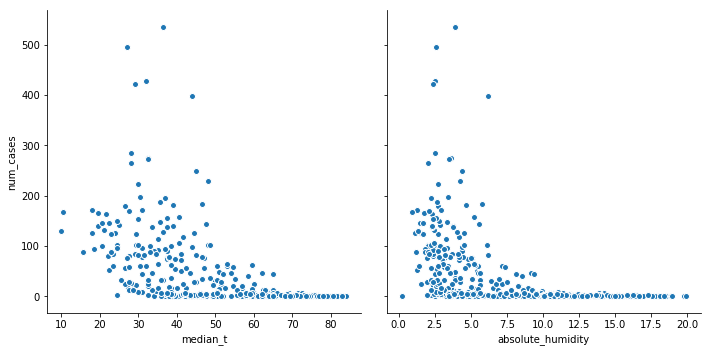

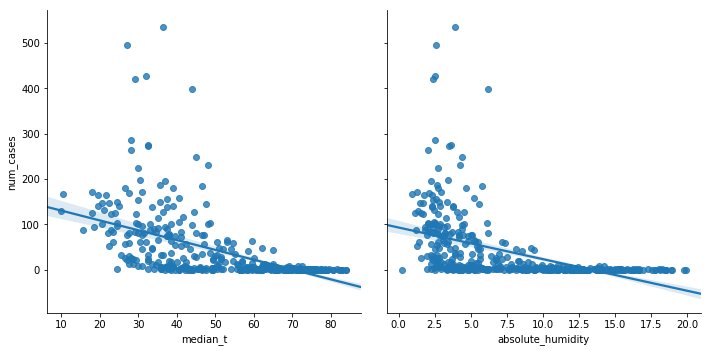

In [73]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['median_t','absolute_humidity'], y_vars='num_cases', size=5)

# final: (note 95% CI)
sns.pairplot(df, x_vars=['median_t','absolute_humidity'], y_vars='num_cases', size=5, aspect=1, kind='reg') 

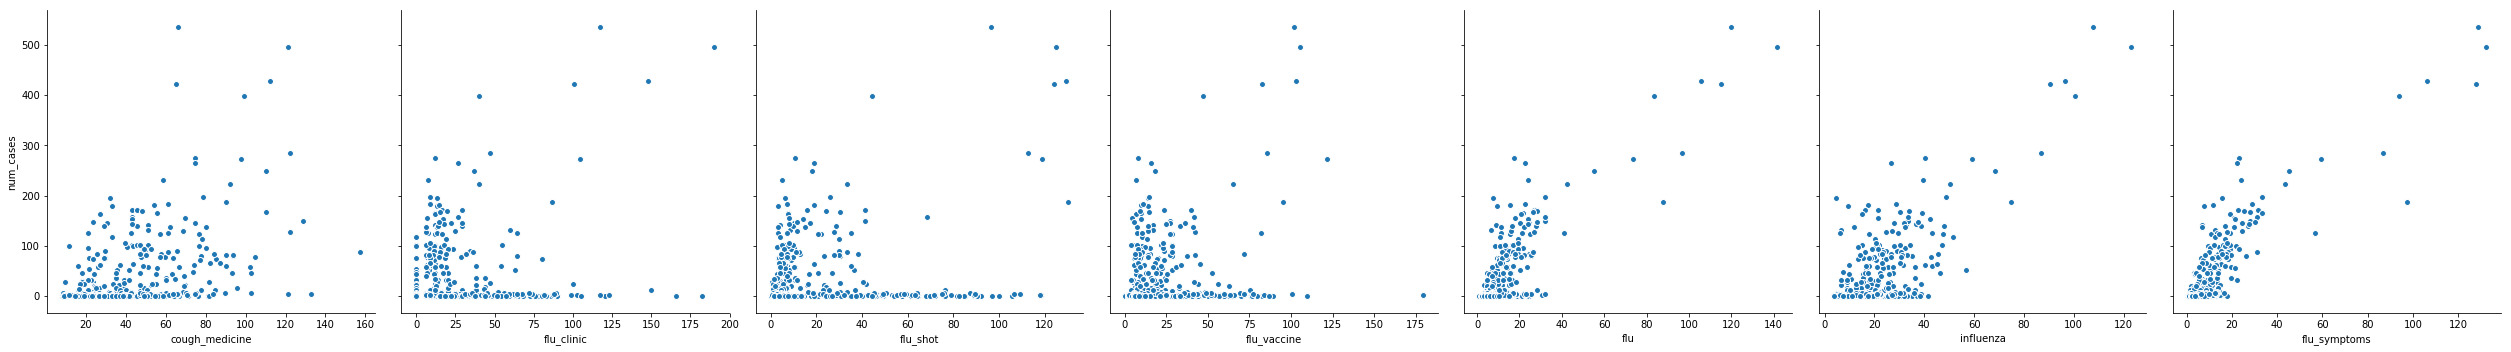

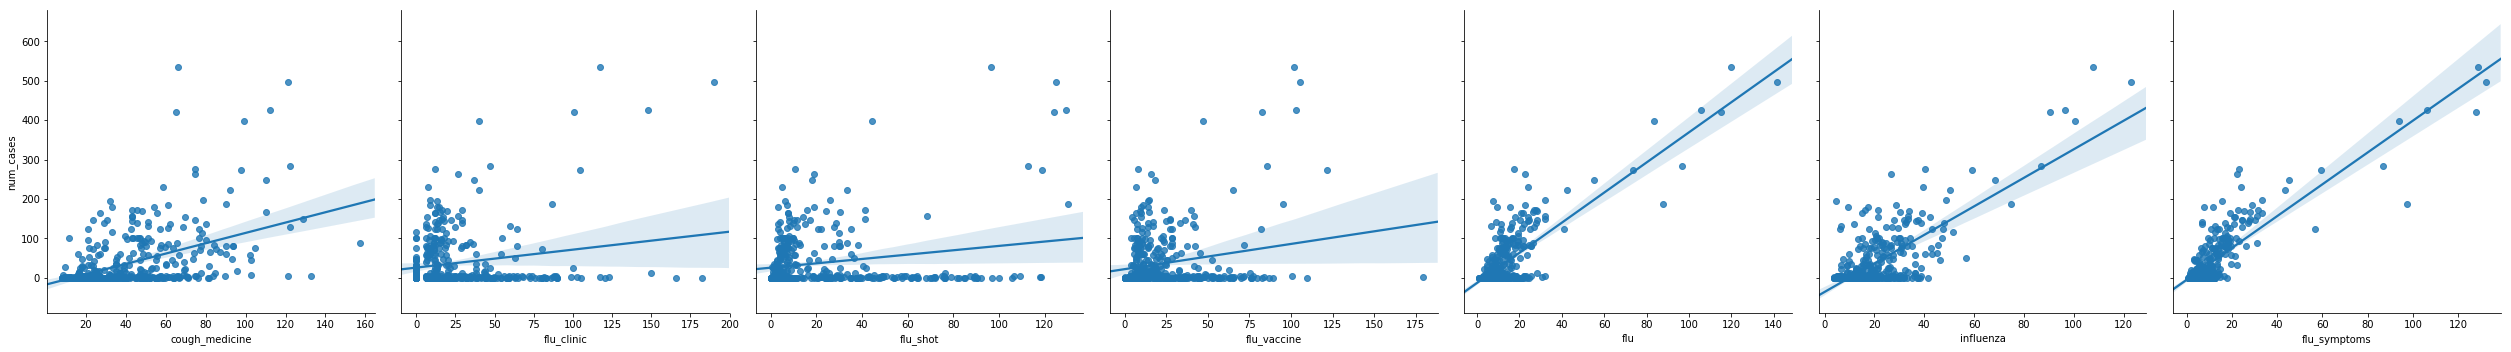

In [74]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['cough_medicine','flu_clinic', 'flu_shot', 'flu_vaccine', 'flu', 'influenza', 'flu_symptoms'], y_vars='num_cases', size=5)

# final: (note 95% CI)
sns.pairplot(df, x_vars=['cough_medicine','flu_clinic', 'flu_shot', 'flu_vaccine', 'flu', 'influenza', 'flu_symptoms'], y_vars='num_cases', size=5, aspect=1, kind='reg') 

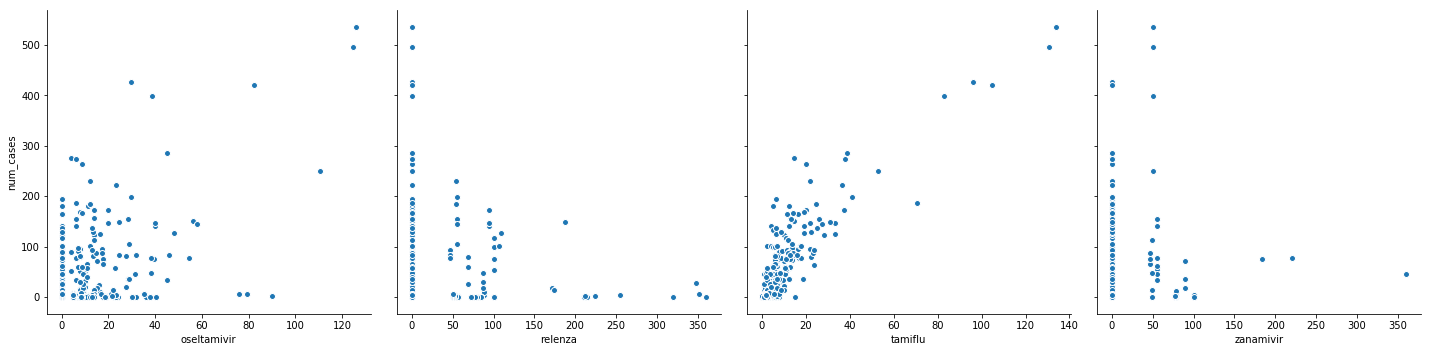

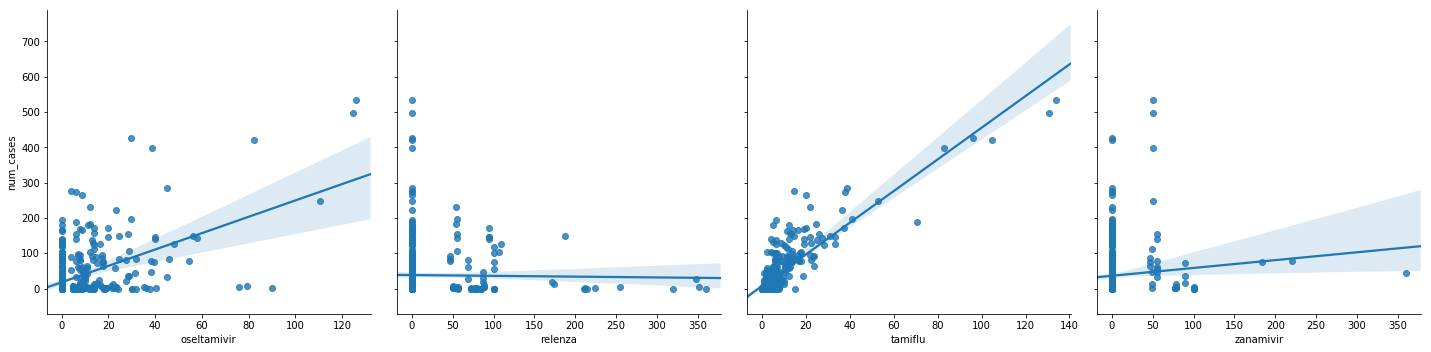

In [75]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['oseltamivir', 'relenza', 'tamiflu', 'zanamivir'], y_vars='num_cases', size=5)

# final: (note 95% CI)
sns.pairplot(df, x_vars=['oseltamivir', 'relenza', 'tamiflu', 'zanamivir'], y_vars='num_cases', size=5, aspect=1, kind='reg') 

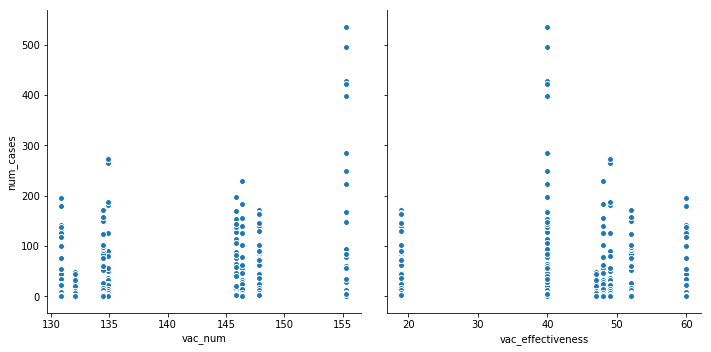

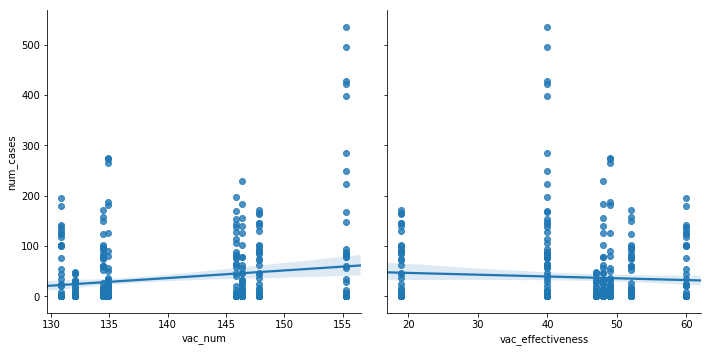

In [76]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['vac_num','vac_effectiveness'], y_vars='num_cases', size=5)

# final: (note 95% CI)
sns.pairplot(df, x_vars=['vac_num','vac_effectiveness'], y_vars='num_cases', size=5, aspect=1, kind='reg') 

In [77]:
feature_cols = ['median_t', 'absolute_humidity', 
                'cough_medicine','flu_clinic', 'flu_shot', 'flu_vaccine', 'flu', 
                'influenza', 'flu_symptoms', 'tamiflu', 'week']

## Split data WITHOUT normalization
X_train = df.head(365)
X_train = X_train.drop('year', axis = 1)
X_train = X_train.drop('total.specimens', axis = 1)
X_train = X_train.drop('percent.positive', axis = 1)
X_train = X_train.drop('num_cases', axis = 1)
X_train = X_train[feature_cols]

y_train = df.head(365)[['num_cases']].copy()

X_test = df.tail(53)
X_test = X_test.drop('year', axis = 1)
X_test = X_test.drop('total.specimens', axis = 1)
X_test = X_test.drop('percent.positive', axis = 1)
X_test = X_test.drop('num_cases', axis = 1)
X_test = X_test[feature_cols]

y_test = df.tail(53)[['num_cases']].copy()

In [78]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(365, 11)
(365, 1)
(53, 11)
(53, 1)


## Normalize using Z-Scores

In [58]:
cols = list(df.columns)
cols = cols[4:-1]
normalized_df = pd.DataFrame()
normalized_df['year'] = df['year']
normalized_df['week'] = df['week']
normalized_df['total_specimens'] = df['total.specimens']
normalized_df['percent_positive'] = df['percent.positive']
normalized_df['num_cases'] = df['num_cases']
normalized_df.head()

,year,week,total_specimens,percent_positive,num_cases
0,2010,40,54,0.00,0.0000
1,2010,41,57,1.75,0.9975
2,2010,42,71,1.41,1.0011
3,2010,43,77,2.60,2.0020
4,2010,44,68,0.00,0.0000


In [59]:
# want to z-score everything but the value we are trying to predict
# so we shouldn't z_score totalspecimens, percent positive, or num_cases

for col in cols:
    col_zscore = col
    normalized_df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

normalized_df.head()

,year,week,total_specimens,percent_positive,num_cases,cough_medicine,flu_clinic,flu_shot,flu_vaccine,flu,...,vac_num,vac_effectiveness,all_rate,rate_0_4,rate_5_17,rate_18_49,rate_50_64,rate_65_plus,celcius_median_t,absolute_humidity
0,2010,40,54,0.00,0.0000,0.528825,3.188499,2.302200,0.878540,0.310444,...,-1.203095,1.38089,-0.801621,-0.471581,-0.685421,-0.826883,-0.739146,-0.730878,0.216621,0.310198
1,2010,41,57,1.75,0.9975,0.528825,4.692148,0.957697,1.339458,0.509547,...,-1.203095,1.38089,-0.801621,-0.471581,-0.685421,-0.826883,-0.739146,-0.730878,0.076172,-0.180466
2,2010,42,71,1.41,1.0011,1.551382,1.843128,1.982080,0.351777,0.244076,...,-1.203095,1.38089,-0.801621,-0.471581,-0.685421,-0.826883,-0.739146,-0.730878,-0.120457,-0.423951
3,2010,43,77,2.60,2.0020,0.468675,2.128030,1.149769,1.734530,0.111340,...,-1.203095,1.38089,-0.766122,-0.471581,-0.685421,-0.826883,-0.739146,-0.694926,0.413250,0.146384
4,2010,44,68,0.00,0.0000,0.288224,1.763989,0.573553,1.668685,0.111340,...,-1.203095,1.38089,-0.766122,-0.471581,-0.685421,-0.720761,-0.739146,-0.730878,-0.485625,-0.546905


In [60]:
feature_cols = ['median_t', 'absolute_humidity', 
                'cough_medicine','flu_clinic', 'flu_shot', 'flu_vaccine', 'flu', 
                'influenza', 'flu_symptoms', 'oseltamivir', 'tamiflu']

## Split data WITH normalization
norm_X_train = normalized_df.head(365)
norm_X_train = norm_X_train.drop('year', axis = 1)
norm_X_train = norm_X_train.drop('total_specimens', axis = 1)
norm_X_train = norm_X_train.drop('percent_positive', axis = 1)
norm_X_train = norm_X_train.drop('num_cases', axis = 1)
norm_X_train = norm_X_train[feature_cols]

norm_y_train = normalized_df.head(365)[['num_cases']].copy()

norm_X_test = normalized_df.tail(53)
norm_X_test = norm_X_test.drop('year', axis = 1)
norm_X_test = norm_X_test.drop('total_specimens', axis = 1)
norm_X_test = norm_X_test.drop('percent_positive', axis = 1)
norm_X_test = norm_X_test.drop('num_cases', axis = 1)
norm_X_test = norm_X_test[feature_cols]

norm_y_test = normalized_df.tail(53)[['num_cases']].copy()

In [61]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(365, 11)
(365, 1)
(53, 11)
(53, 1)


## Base Model
Predict the weekly number of flu cases based on averaging the number of previous flu cases of that the given week for sevearal past years.
<br>
Use data from 2010-2016, 2018 to predict 

In [79]:
bX_train = df.head(365)
bX_train = bX_train[['week', 'year', 'num_cases']]

In [80]:
y_pred_base = df.groupby('week').mean()['num_cases']
y_pred_base = y_pred_base[0:52]
y_pred_base = y_pred_base[39:52].append(y_pred_base[0:39])
y_test = y_test.reset_index()
y_test = y_test.drop('index', axis = 1)
y_test = y_test.head(52)
metrics.r2_score(y_test, y_pred_base)

0.45087855451807213

In [72]:
print("The root mean squared error of the base model is", sqrt(mean_squared_error(y_test, 
                                                                             y_pred_base)))

The root mean squared error of the base model is 103.71761630274405


In [81]:
y_pred_base

week
40      1.664989
41      2.623850
42      2.124888
43      1.126550
44      1.873263
45      1.375700
46      3.125875
47      3.254650
48      4.872700
49     13.873363
50     24.000300
51     51.120562
52     88.368488
1     107.876425
2     124.251887
3     137.122875
4     143.115100
5     142.618288
6     146.634100
7     151.372037
8     129.873850
9     103.993775
10     98.872800
11     82.873413
12     76.127988
13     65.256050
14     61.746012
15     55.616713
16     46.243525
17     31.122013
18     20.753813
19      9.254075
20      6.500875
21      3.748100
22      2.749012
23      1.121125
24      0.501975
25      0.750650
26      1.248513
27      0.125800
28      0.749925
29      0.125625
30      0.375150
31      0.499375
32      0.623862
33      0.374363
34      0.373438
35      0.375500
36      0.375888
37      0.500513
38      0.876337
39      1.250313
Name: num_cases, dtype: float64

In [82]:
y_test

,num_cases
0,1.0045
1,1.9971
2,3.9905
3,3.0132
4,6.0060
5,4.0000
6,6.0147
7,7.0196
8,4.9816
9,7.0148


In [83]:
y_pred_base = y_pred_base.reset_index()

In [82]:
y_pred_base = y_pred_base.drop('level_0', axis = 1)

In [85]:
y_pred_base = y_pred_base.drop('week', axis = 1)

In [74]:
y_test

,num_cases
0,1.0045
1,1.9971
2,3.9905
3,3.0132
4,6.0060
5,4.0000
6,6.0147
7,7.0196
8,4.9816
9,7.0148


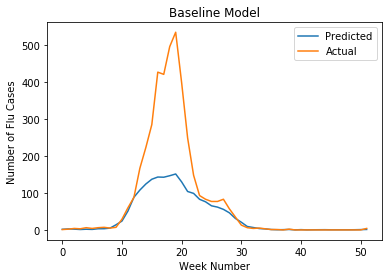

In [86]:
plt.plot(y_pred_base)
plt.plot(y_test)

plt.title('Baseline Model')
plt.ylabel('Number of Flu Cases')
plt.xlabel('Week Number')
plt.legend(['Predicted', 'Actual'])

In [95]:
data = y_test - y_pred_base

/Users/francescalim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


The mean of this error distribution is: num_cases    41.490584
dtype: float64
The standard deviation of this error distribution is: num_cases    95.984631
dtype: float64


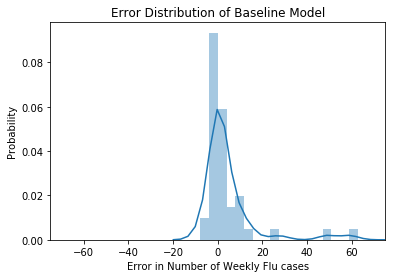

In [99]:
ax = sns.distplot(data, bins=100, label='Error in Number of Weekly Flu Cases')
mean_error = data.mean()
standard_error = data.std()
ax.set_xlim((-75,75))   
ax.set_title('Error Distribution of Baseline Model')
ax.set_xlabel('Error in Number of Weekly Flu cases')
ax.set_ylabel('Probability')
print("The mean of this error distribution is:", mean_error)
print("The standard deviation of this error distribution is:", standard_error)

In [37]:
avg_week = bX_train.groupby('week').describe()[['num_cases']]
avg_num_cases = avg_week['num_cases']['mean']
avg_num_cases = avg_num_cases.head(52)
avg_num_cases = avg_num_cases.reset_index(drop=True)
avg_num_cases

0      99.432286
1     110.145471
2     115.996929
3     102.567314
4     102.853871
5      96.720171
6      96.575386
7      91.568300
8      83.285886
9      91.857371
10     81.429586
11     75.141929
12     63.579443
13     59.568214
14     51.704814
15     44.709243
16     30.569586
17     21.860400
18      9.716886
19      6.857571
20      3.570743
21      2.711671
22      1.139771
23      0.429943
24      0.857886
25      1.141500
26      0.143771
27      0.857057
28      0.143571
29      0.428743
30      0.570714
31      0.712986
32      0.427843
33      0.426786
34      0.429143
35      0.429586
36      0.572014
37      1.001529
38      0.855671
39      1.428171
40      2.713386
41      1.858371
42      0.857029
43      1.282871
44      1.000800
45      2.713186
46      2.716800
47      4.857143
48     14.853157
49     23.282457
50     49.855629
51     88.418729
Name: mean, dtype: float64

In [19]:
# Test data set
bX_test = df.tail(53)
bX_test = bX_test.head(52) # remove last row
bX_test = bX_test.reset_index(drop=True)
true_num_cases = bX_test['num_cases']

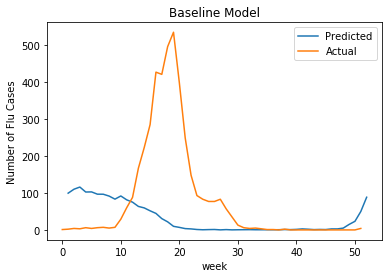

In [22]:
avg_num_cases.plot(kind='line')
true_num_cases.plot(kind='line')
plt.title('Baseline Model')
plt.ylabel('Number of Flu Cases')
plt.legend(['Predicted', 'Actual'])

In [32]:
print("The root mean squared error of the base model is", sqrt(mean_squared_error(true_num_cases, 
                                                                             avg_num_cases)))
print("The r2 score of the base model is", r2_score(true_num_cases, avg_num_cases))

The root mean squared error of the base model is 158.7850697012273
The r2 score of the base model is -0.28701224541


In [34]:
data = true_num_cases.values - avg_num_cases.values
diff_df = pd.DataFrame()
diff_df['diff'] = data

/Users/francescalim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


The mean of this error distribution is: 47.424178571428584
The standard deviation of this error distribution is: 153.0160553946931


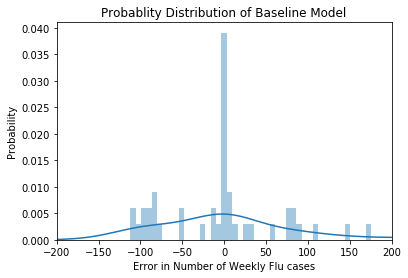

In [36]:
ax = sns.distplot(diff_df['diff'], bins=100, label='Error in Number of Weekly Flu Cases')
mean_error = diff_df['diff'].mean()
standard_error = diff_df['diff'].std()
ax.set_xlim((-200,200))   
ax.set_title('Probablity Distribution of Baseline Model')
ax.set_xlabel('Error in Number of Weekly Flu cases')
ax.set_ylabel('Probability')
print("The mean of this error distribution is:", mean_error)
print("The standard deviation of this error distribution is:", standard_error)

In [24]:
# Test data set
bX_test = df.tail(53)
bX_test = bX_test.head(52) # remove last row
bX_test = bX_test.reset_index(drop=True)
true_num_cases = bX_test['num_cases']

In [25]:
plt.plot(avg_num_cases['week'], avg_num_cases['mean'])

KeyError: 'week'

In [ ]:
week_1 = bX_train[bX_train['week'] == 1]
week_2 = bX_train[bX_train['week'] == 2]
week_3 = bX_train[bX_train['week'] == 3]
week_4 = bX_train[bX_train['week'] == 4]
week_5 = bX_train[bX_train['week'] == 5]
week_6 = bX_train[bX_train['week'] == 6]
week_7 = bX_train[bX_train['week'] == 7]
week_8 = bX_train[bX_train['week'] == 8]
week_9 = bX_train[bX_train['week'] == 9]
week_10 = bX_train[bX_train['week'] == 10]
week_11 = bX_train[bX_train['week'] == 11]
week_12 = bX_train[bX_train['week'] == 12]
week_13 = bX_train[bX_train['week'] == 13]
week_14 = bX_train[bX_train['week'] == 14]
week_15 = bX_train[bX_train['week'] == 15]
week_16 = bX_train[bX_train['week'] == 16]
week_17 = bX_train[bX_train['week'] == 17]
week_18 = bX_train[bX_train['week'] == 18]
week_19 = bX_train[bX_train['week'] == 19]
week_20 = bX_train[bX_train['week'] == 20]
week_21 = bX_train[bX_train['week'] == 21]
week_22 = bX_train[bX_train['week'] == 22]
week_23 = bX_train[bX_train['week'] == 23]
week_24 = bX_train[bX_train['week'] == 24]
week_25 = bX_train[bX_train['week'] == 25]
week_26 = bX_train[bX_train['week'] == 26]
week_27 = bX_train[bX_train['week'] == 27]
week_28 = bX_train[bX_train['week'] == 28]
week_29 = bX_train[bX_train['week'] == 29]
week_30 = bX_train[bX_train['week'] == 30]
week_31 = bX_train[bX_train['week'] == 31]
week_32 = bX_train[bX_train['week'] == 32]
week_33 = bX_train[bX_train['week'] == 33]
week_34 = bX_train[bX_train['week'] == 34]
week_35 = bX_train[bX_train['week'] == 35]
week_36 = bX_train[bX_train['week'] == 36]
week_37 = bX_train[bX_train['week'] == 37]
week_38 = bX_train[bX_train['week'] == 38]
week_39 = bX_train[bX_train['week'] == 39]
week_40 = bX_train[bX_train['week'] == 40]
week_41 = bX_train[bX_train['week'] == 41]
week_42 = bX_train[bX_train['week'] == 42]
week_43 = bX_train[bX_train['week'] == 43]
week_44 = bX_train[bX_train['week'] == 44]
week_45 = bX_train[bX_train['week'] == 45]
week_46 = bX_train[bX_train['week'] == 46]
week_47 = bX_train[bX_train['week'] == 47]
week_48 = bX_train[bX_train['week'] == 48]
week_49 = bX_train[bX_train['week'] == 49]
week_50 = bX_train[bX_train['week'] == 50]
week_51 = bX_train[bX_train['week'] == 51]
week_52 = bX_train[bX_train['week'] == 52]

# Get average for each week 2010-2016, 2018
w1_avg = week_1['num_cases'].mean()
w2_avg = week_2['num_cases'].mean()
w3_avg = week_3['num_cases'].mean()
w4_avg = week_4['num_cases'].mean()
w5_avg = week_5['num_cases'].mean()
w6_avg = week_6['num_cases'].mean()
w7_avg = week_7['num_cases'].mean()
w8_avg = week_8['num_cases'].mean()
w9_avg = week_9['num_cases'].mean()
w10_avg = week_10['num_cases'].mean()
w11_avg = week_11['num_cases'].mean()
w12_avg = week_12['num_cases'].mean()
w13_avg = week_13['num_cases'].mean()
w14_avg = week_14['num_cases'].mean()
w15_avg = week_15['num_cases'].mean()
w16_avg = week_16['num_cases'].mean()
w17_avg = week_17['num_cases'].mean()
w18_avg = week_18['num_cases'].mean()
w19_avg = week_19['num_cases'].mean()
w20_avg = week_20['num_cases'].mean()
w21_avg = week_21['num_cases'].mean()
w22_avg = week_22['num_cases'].mean()
w23_avg = week_23['num_cases'].mean()
w24_avg = week_24['num_cases'].mean()
w25_avg = week_25['num_cases'].mean()
w26_avg = week_26['num_cases'].mean()
w27_avg = week_27['num_cases'].mean()
w28_avg = week_28['num_cases'].mean()
w29_avg = week_29['num_cases'].mean()
w30_avg = week_30['num_cases'].mean()
w31_avg = week_31['num_cases'].mean()
w32_avg = week_32['num_cases'].mean()
w33_avg = week_33['num_cases'].mean()
w34_avg = week_34['num_cases'].mean()
w35_avg = week_35['num_cases'].mean()
w36_avg = week_36['num_cases'].mean()
w37_avg = week_37['num_cases'].mean()
w38_avg = week_38['num_cases'].mean()
w39_avg = week_39['num_cases'].mean()
w40_avg = week_40['num_cases'].mean()
w41_avg = week_41['num_cases'].mean()
w42_avg = week_42['num_cases'].mean()
w43_avg = week_43['num_cases'].mean()
w44_avg = week_44['num_cases'].mean()
w45_avg = week_45['num_cases'].mean()
w46_avg = week_46['num_cases'].mean()
w47_avg = week_47['num_cases'].mean()
w48_avg = week_48['num_cases'].mean()
w49_avg = week_49['num_cases'].mean()
w50_avg = week_50['num_cases'].mean()
w51_avg = week_51['num_cases'].mean()
w52_avg = week_52['num_cases'].mean()

In [393]:
# Test data set
bX_test = df.tail(53)
bX_test = bX_test.head(52) # remove last row
bX_test = bX_test.reset_index(drop=True)
bX_test

,year,week,total.specimens,percent.positive,cough_medicine,flu_clinic,flu_shot,flu_vaccine,flu,influenza,...,vac_effectiveness,all_rate,rate_0_4,rate_5_17,rate_18_49,rate_50_64,rate_65_plus,celcius_median_t,absolute_humidity,num_cases
0,2017,40,287,0.35,58.628319,58.880000,100.264026,76.326923,21.095890,38.333333,...,40,0.1,0.0,0.0,0.0,0.0,0.6,16.944444,11.100461,1.0045
1,2017,41,317,0.63,46.902655,43.520000,88.943894,63.000000,22.602740,17.311828,...,40,0.0,0.0,0.0,0.0,0.0,0.0,18.333333,11.276299,1.9971
2,2017,42,347,1.15,65.663717,58.880000,106.732673,71.480769,25.616438,22.258065,...,40,0.1,0.0,0.0,0.2,0.0,0.0,14.722222,8.128401,3.9905
3,2017,43,372,0.81,18.761062,87.040000,118.052805,52.096154,22.602740,27.204301,...,40,0.1,0.0,0.0,0.0,0.0,0.6,14.444444,10.221761,3.0132
4,2017,44,429,1.40,75.044248,71.680000,76.006601,52.096154,18.082192,9.892473,...,40,0.2,0.0,0.0,0.0,0.0,1.1,14.444444,8.673009,6.0060
5,2017,45,400,1.00,74.866310,34.285714,75.234043,19.862069,18.488889,14.904110,...,40,0.2,0.0,0.0,0.0,0.0,1.1,5.555556,4.723145,4.0000
6,2017,46,489,1.23,89.839572,24.935065,50.638298,35.310345,17.066667,21.424658,...,40,0.2,0.0,0.0,0.2,0.0,0.6,2.222222,4.063830,6.0147
7,2017,47,436,1.61,102.673797,35.844156,28.936170,13.241379,11.377778,14.904110,...,40,0.4,0.0,0.0,0.0,0.5,1.7,5.555556,3.736219,7.0196
8,2017,48,479,1.04,132.620321,24.935065,49.191489,59.586207,17.066667,16.767123,...,40,0.1,0.0,0.0,0.0,0.0,0.6,3.611111,3.810963,4.9816
9,2017,49,494,1.42,47.173145,12.692308,45.409091,48.818898,17.062500,30.211864,...,40,0.9,0.0,0.0,0.2,0.0,4.5,3.055556,4.298589,7.0148


In [404]:
data = {'num_cases': [w40_avg, w41_avg, w42_avg, w43_avg, w44_avg, w45_avg, w46_avg, w47_avg, w48_avg, 
                      w49_avg, w50_avg, w51_avg, w52_avg, w1_avg, w2_avg, w3_avg, w4_avg, w5_avg, w6_avg, w7_avg, 
                      w8_avg, w9_avg, w10_avg, w11_avg, w12_avg, w13_avg, w14_avg, w15_avg, w16_avg, w17_avg, 
                      w18_avg, w19_avg, w20_avg, w21_avg, w22_avg, w23_avg, w24_avg, w25_avg, w26_avg, w27_avg, 
                      w28_avg, w29_avg, w30_avg, w31_avg, w32_avg, w33_avg, w34_avg, w35_avg, w36_avg, w37_avg, 
                      w38_avg, w39_avg]}
base_pred_df = pd.DataFrame(data)
base_pred_df.head()

,num_cases
0,1.428171
1,2.713386
2,1.858371
3,0.857029
4,1.282871


In [ ]:
sqrt(mean_squared_error(bX_test['num_cases']

In [395]:
print("The root mean squared error of the base model is", sqrt(mean_squared_error(bX_test['num_cases'], 
                                                                             base_pred_df['num_cases'])))
print("The r2 score of the base model is", r2_score(bX_test['num_cases'], base_pred_df['num_cases']))
print("The mean absolute error of the base model is", mean_absolute_error(bX_test['num_cases'], 
                                                                          base_pred_df['num_cases']))

The root mean squared error of the base model is 118.53438697158255
The r2 score of the base model is 0.282780535974
The mean absolute error of the base model is 48.6526324176


In [407]:
base_pred_df['diff'] = bX_train['num_cases'] - base_pred_df['num_cases']
base_pred_df.head()

,num_cases,diff
0,1.428171,-1.428171
1,2.713386,-1.715886
2,1.858371,-0.857271
3,0.857029,1.144971
4,1.282871,-1.282871


/Users/francescalim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


The mean of this error distribution is: 0.02290989921394692
The standard deviation of this error distribution is: 0.1933413516402324


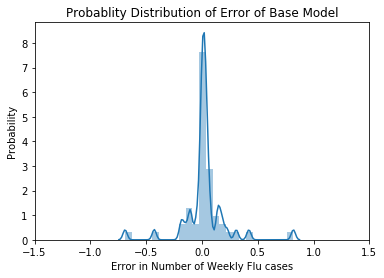

In [67]:
# Graph error distribution

ax = sns.distplot(base_pred_df['diff'], bins=25, label='Error in Number of Weekly Flu Cases')
mean_error = base_pred_df['diff'].mean()
standard_error = base_pred_df['diff'].std()
ax.set_xlim((-1.5,1.5))   
ax.set_title('Probablity Distribution of Error of Base Model')
ax.set_xlabel('Error in Number of Weekly Flu cases')
ax.set_ylabel('Probability')
print("The mean of this error distribution is:", mean_error)
print("The standard deviation of this error distribution is:", standard_error)

## Linear Regression

In [353]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [354]:
print("The intercept of the linear regression is", linreg.intercept_) # Beta0
print("The coefficients of the lienar regression are", linreg.coef_) # Beta1, 2, 3

The intercept of the linear regression is [ 58.94962364]
The coefficients of the lienar regression are [[-1.14864798  1.9747143   0.11696703 -0.10063379 -0.4557595  -0.21475851
   2.26693631  0.09863872  0.23647169  2.17772077 -0.44257866]]


In [355]:
y_pred = linreg.predict(X_test)

In [356]:
print("The R^2 of the linear regression is", linreg.score(X_test,y_test))
print("The mean absolute error of the linear regression model is", metrics.mean_absolute_error(y_test, y_pred))
print("The root mean squared error of the linear regression model is", metrics.mean_squared_error(y_test, y_pred)**.5)

The R^2 of the linear regression is 0.97389225098
The mean absolute error of the linear regression model is 16.4932007409
The root mean squared error of the linear regression model is 22.4618067789


## Linear Regression with Normalization

In [357]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(norm_X_train, norm_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [358]:
print("The intercept of the linear regression is", linreg.intercept_) # Beta0
print("The coefficients of the linear regression are", linreg.coef_) # Beta1, 2, 3

The intercept of the linear regression is [ 39.75297558]
The coefficients of the lienar regression are [[-19.95128365   8.49062698   2.76492202  -3.52345179 -18.15616341
   -5.52464567  39.12606296   1.16406742   5.96571515   2.77600482
   29.62935077]]


In [362]:
norm_y_pred = linreg.predict(norm_X_test)
print("The R^2 of the linear regression is", linreg.score(norm_X_test,norm_y_test))
print("The mean absolute error of the linear regression model is", metrics.mean_absolute_error(norm_y_test, norm_y_pred))
print("The root mean squared error of the linear regression model is", metrics.mean_squared_error(norm_y_test, norm_y_pred)**.5)

The R^2 of the linear regression is 0.948068820602
The mean absolute error of the linear regression model is 22.5031929488
The root mean squared error of the linear regression model is 31.6791897654


In [100]:
data = y_test.values - y_pred
diff_df = pd.DataFrame()
diff_df['linreg_diff'] = data

/Users/francescalim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


The mean of this error distribution is: 1.4342161338757524
The standard deviation of this error distribution is: 30.7602713900232


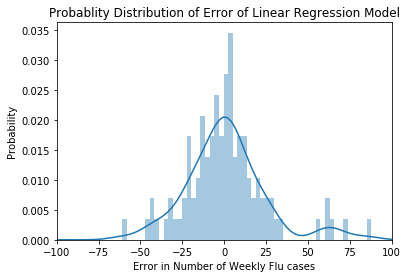

In [107]:
ax = sns.distplot(diff_df['linreg_diff'], bins=100, label='Error in Number of Weekly Flu Cases')
mean_error = diff_df['linreg_diff'].mean()
standard_error = diff_df['linreg_diff'].std()
ax.set_xlim((-100,100))   
ax.set_title('Probablity Distribution of Error of Linear Regression Model')
ax.set_xlabel('Error in Number of Weekly Flu cases')
ax.set_ylabel('Probability')
print("The mean of this error distribution is:", mean_error)
print("The standard deviation of this error distribution is:", standard_error)

Only include google search trends, does worse than combining all terms

In [226]:
google_cols = ['cough_medicine','flu_clinic', 'flu_shot', 'flu_vaccine', 'flu', 
                'influenza', 'flu_symptoms', 'oseltamivir', 'tamiflu']

# use the list to select a subset of the original DataFrame
google_X = df[google_cols]

In [227]:
gX_train, gX_test, gy_train, gy_test = train_test_split(google_X, y, random_state=1)

In [230]:
google_linreg = LinearRegression()
google_linreg.fit(X_train, y_train)
gy_pred = google_linreg.predict(gX_test)

In [231]:
print("The R^2 of the google terms linear regression is", google_linreg.score(gX_test,gy_test))
print("The mean absolute error of the google terms linear regression model is", metrics.mean_absolute_error(gy_test, gy_pred))
print("The mean squared error of the google terms linear regression model is", metrics.mean_squared_error(gy_test, gy_pred))

The R^2 of the google terms linear regression is 0.744738696192
The mean absolute error of the google terms linear regression model is 20.3474966339
The mean squared error of the google terms linear regression model is 1167.481115


## Ridge Regression

In [213]:
from sklearn.linear_model import Ridge
from sklearn import linear_model

ridgereg = linear_model.Ridge(alpha = 1.0)
ridgereg.fit(X_train, y_train)
ridge_y_pred = ridgereg.predict(X_test)

In [214]:
print("The R^2 of the ridge regression is", ridgereg.score(X_test,y_test))
print("The mean absolute error of the ridge regression model is", metrics.mean_absolute_error(y_test, y_pred))
print("The mean squared error of the ridge regression model is", metrics.mean_squared_error(y_test, y_pred))

The R^2 of the ridge regression is 0.794642882781
The mean absolute error of the ridge regression model is 19.4707317069
The mean squared error of the ridge regression model is 939.239897659


In [215]:
data = y_test.values - ridge_y_pred
diff_df = pd.DataFrame()
diff_df['ridgereg_diff'] = data

/Users/francescalim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


The mean of this error distribution is: 1.43454667393712
The standard deviation of this error distribution is: 30.76018866463328


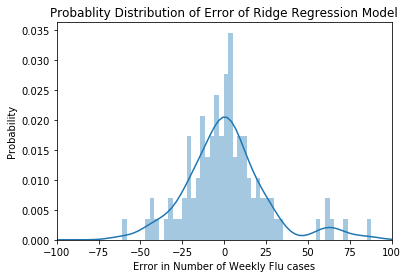

In [217]:
ax = sns.distplot(diff_df['ridgereg_diff'], bins=100, label='Error in Number of Weekly Flu Cases')
mean_error = diff_df['ridgereg_diff'].mean()
standard_error = diff_df['ridgereg_diff'].std()
ax.set_xlim((-100,100))   
ax.set_title('Probablity Distribution of Error of Ridge Regression Model')
ax.set_xlabel('Error in Number of Weekly Flu cases')
ax.set_ylabel('Probability')
print("The mean of this error distribution is:", mean_error)
print("The standard deviation of this error distribution is:", standard_error)

## Decision Tree Regression

In [156]:
from sklearn.tree import DecisionTreeRegressor

In [201]:
for depth in range(1,20):
    
    dt_regressor = DecisionTreeRegressor(max_depth=depth)
    dt_regressor.fit(X_train, y_train)

    # Predict
    dt_y_pred = dt_regressor.predict(X_test)
    
    print("The mean absolute error of the Decision Tree Regression of depth {} is".format(depth),
          metrics.mean_absolute_error(y_test, dt_y_pred))

The mean absolute error of the Decision Tree Regression of depth 1 is 39.1904556629
The mean absolute error of the Decision Tree Regression of depth 2 is 24.2299299135
The mean absolute error of the Decision Tree Regression of depth 3 is 23.0292280805
The mean absolute error of the Decision Tree Regression of depth 4 is 21.4497463999
The mean absolute error of the Decision Tree Regression of depth 5 is 19.8245384037
The mean absolute error of the Decision Tree Regression of depth 6 is 18.8472872581
The mean absolute error of the Decision Tree Regression of depth 7 is 21.0847844905
The mean absolute error of the Decision Tree Regression of depth 8 is 20.8733346006
The mean absolute error of the Decision Tree Regression of depth 9 is 21.4488153067
The mean absolute error of the Decision Tree Regression of depth 10 is 23.4204012923
The mean absolute error of the Decision Tree Regression of depth 11 is 20.490097557
The mean absolute error of the Decision Tree Regression of depth 12 is 21.8

Depth of 6 gives the smallest mean absolute error.

In [202]:
dt_regressor = DecisionTreeRegressor(max_depth=6)
 
dt_regressor.fit(X_train, y_train)

# Predict
dt_y_pred = dt_regressor.predict(X_test)

In [173]:
print("The R^2 of the Decision Tree Regressor is", linreg.score(X_test,y_test))
print("The mean absolute error of the Decision Tree Regressor is", metrics.mean_absolute_error(y_test, dt_y_pred))
print("The mean squared error of the Decision Tree Regressor is", metrics.mean_squared_error(y_test, dt_y_pred))

The R^2 of the Decision Tree Regressor is 0.794641987965
The mean absolute error of the Decision Tree Regressor is 19.06213202
The mean squared error of the Decision Tree Regressor is 1419.60945054


In [174]:
data = y_test.values - dt_y_pred
diff_df = pd.DataFrame()
diff_df['dt_diff'] = data

/Users/francescalim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


The mean of this error distribution is: -1.6996767267825659
The standard deviation of this error distribution is: 37.819873909660224


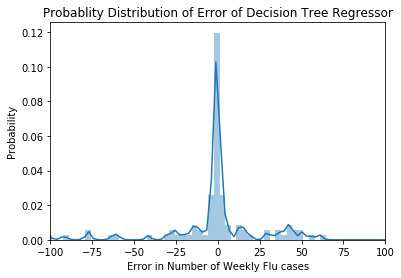

In [175]:
ax = sns.distplot(diff_df['dt_diff'], bins=100, label='Error in Number of Weekly Flu Cases')
mean_error = diff_df['dt_diff'].mean()
standard_error = diff_df['dt_diff'].std()
ax.set_xlim((-100,100))   
ax.set_title('Probablity Distribution of Error of Decision Tree Regressor')
ax.set_xlabel('Error in Number of Weekly Flu cases')
ax.set_ylabel('Probability')
print("The mean of this error distribution is:", mean_error)
print("The standard deviation of this error distribution is:", standard_error)

## Decision Tree With Boosting

In [205]:
from sklearn.ensemble import AdaBoostRegressor

rng = np.random.RandomState(1)
boost_dt = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6),
                          n_estimators=30, random_state=rng)
boost_dt.fit(X_train, y_train)

# Predict
boost_y_pred = boost_dt.predict(X_test)

In [207]:
print("The R^2 of the Ada Boost Regressor is", linreg.score(X_test,y_test))
print("The mean absolute error of the Ada Boost Regressor is", metrics.mean_absolute_error(y_test, boost_y_pred))
print("The mean squared error of the Ada Boost Regressor is", metrics.mean_squared_error(y_test, boost_y_pred))

The R^2 of the Ada Boost Regressor is 0.794641987965
The mean absolute error of the Ada Boost Regressor is 16.0560692248
The mean squared error of the Ada Boost Regressor is 1059.88105763


In [208]:
data = y_test.values - boost_y_pred
diff_df = pd.DataFrame()
diff_df['adaboost_diff'] = data

/Users/francescalim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


The mean of this error distribution is: 0.08132995100428109
The standard deviation of this error distribution is: 32.71185631368512


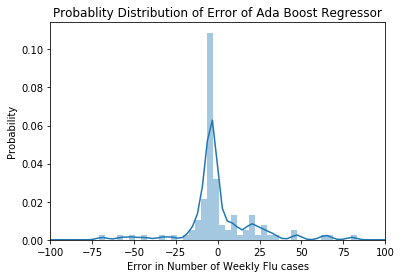

In [209]:
ax = sns.distplot(diff_df['adaboost_diff'], bins=100, label='Error in Number of Weekly Flu Cases')
mean_error = diff_df['adaboost_diff'].mean()
standard_error = diff_df['adaboost_diff'].std()
ax.set_xlim((-100,100))   
ax.set_title('Probablity Distribution of Error of Ada Boost Regressor')
ax.set_xlabel('Error in Number of Weekly Flu cases')
ax.set_ylabel('Probability')
print("The mean of this error distribution is:", mean_error)
print("The standard deviation of this error distribution is:", standard_error)

## K-Nearest Neighbors Regressor

In [112]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)

# fit the model
knn.fit(X_train, y_train)

knn_pred_y = knn.predict(X_test)

In [114]:
print("The R^2 of the KNN Regressor is", knn.score(X_test,y_test))
print("The mean absolute error of the KNN Regressor is", metrics.mean_absolute_error(y_test, knn_pred_y))
print("The mean squared error of the KNN Regressor is", metrics.mean_squared_error(y_test, knn_pred_y))

The R^2 of the KNN Regressor is 0.742203905938
The mean absolute error of the KNN Regressor is 19.5451500952
The mean squared error of the KNN Regressor is 1179.07441061


Attempt to find best k value using k-fold cross validation

In [122]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(scores)

# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[-1306.48327819  -780.57426275  -539.18017002  -667.5508042   -475.60460376
 -4227.83445228  -622.18948011 -1183.84976721 -1712.60205498  -755.17185674]
-1227.10407303


In [123]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='')
    k_scores.append(scores.mean())
print(k_scores)

[-1375.5384955852924, -1254.8359761378392, -1154.3523152894577, -1200.9981653511509, -1227.1040730255113, -1366.1036274586575, -1443.6442722518054, -1594.3998527722847, -1755.4673464605416, -1851.9526988436385, -1985.0503550546975, -2107.1286488084643, -2131.0185547024125, -2206.6263709115383, -2317.1077620920842, -2354.4598355893445, -2428.7801826801192, -2522.4986325155055, -2573.7588057493272, -2594.9563610633845, -2639.3235220992274, -2695.5745086134416, -2716.7810680002917, -2772.1591761413156, -2826.9200243382015, -2850.1030028166956, -2889.6202541640055, -2927.7485047639834, -2953.8573507993924, -2981.4333612941546]


In [126]:
i = np.argmax(np.array(k_scores))
print('best [k, score] = [%g, %g]'%(k_range[i], k_scores[i]))

best [k, score] = [3, -1154.35]


Text(0,0.5,'Cross-Validated Accuracy')

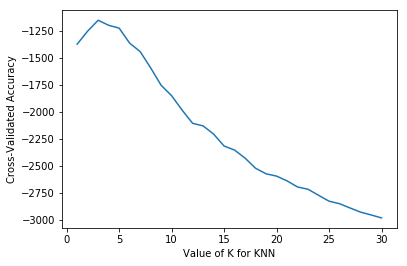

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [152]:
# Use knn = 8

knn = KNeighborsRegressor(n_neighbors=8)

# fit the model
knn.fit(X_train, y_train)

knn_pred_y = knn.predict(X_test)

In [153]:
print("The R^2 of the KNN Regressor is", knn.score(X_test,y_test))
print("The mean absolute error of the KNN Regressor is", metrics.mean_absolute_error(y_test, knn_pred_y))
print("The mean squared error of the KNN Regressor is", metrics.mean_squared_error(y_test, knn_pred_y))

The R^2 of the KNN Regressor is 0.762914981792
The mean absolute error of the KNN Regressor is 18.5402111905
The mean squared error of the KNN Regressor is 1084.34877233


In [154]:
data = y_test.values - knn_pred_y
knn_diff_df = pd.DataFrame()
knn_diff_df['diff'] = data

/Users/francescalim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


The mean of this error distribution is: 6.417885714285712
The standard deviation of this error distribution is: 32.45288731749081


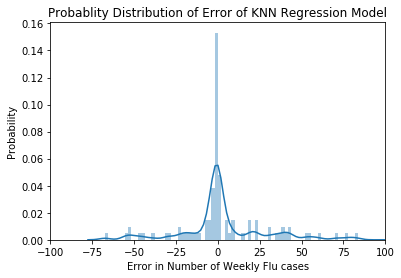

In [155]:
ax = sns.distplot(knn_diff_df['diff'], bins=100, label='Error in Number of Weekly Flu Cases')
mean_error = knn_diff_df['diff'].mean()
standard_error = knn_diff_df['diff'].std()
ax.set_xlim((-100,100))   
ax.set_title('Probablity Distribution of Error of KNN Regression Model')
ax.set_xlabel('Error in Number of Weekly Flu cases')
ax.set_ylabel('Probability')
print("The mean of this error distribution is:", mean_error)
print("The standard deviation of this error distribution is:", standard_error)

We have used the following machine learning models on our dataset.

Ordinary Least Squares Regression
Ridge Regression
K Nearest Neighbors
Decision Trees
Adaboost (with decision trees)
Random Forest Regression
For the evaluation, we show the plots of error distribution and values for the following error metrics:

Root Mean Square Error
R2 score
Mean Absolute Error
Explained Variance Score

## Random Forest Regressor

In [183]:
from sklearn.ensemble import RandomForestRegressor

In [182]:
for depth in range(1,20):
    
    rf_regressor = RandomForestRegressor(max_depth=depth)
    rf_regressor.fit(X_train, y_train)
    
    # Predict
    rf_y_pred = rf_regressor.predict(X_test)
    
    print("The mean absolute error of the Random Forest Regression of depth {} is".format(depth),
          metrics.mean_absolute_error(y_test, rf_y_pred))

The mean absolute error of the Random Forest Regression of depth 1 is 27.5784480245
The mean absolute error of the Random Forest Regression of depth 2 is 19.3796758644
The mean absolute error of the Random Forest Regression of depth 3 is 17.9927313681
The mean absolute error of the Random Forest Regression of depth 4 is 16.3831410616
The mean absolute error of the Random Forest Regression of depth 5 is 15.7333892711
The mean absolute error of the Random Forest Regression of depth 6 is 14.7368651914
The mean absolute error of the Random Forest Regression of depth 7 is 14.7748049528
The mean absolute error of the Random Forest Regression of depth 8 is 13.6001062496
The mean absolute error of the Random Forest Regression of depth 9 is 16.3642836066
The mean absolute error of the Random Forest Regression of depth 10 is 14.9561144388
The mean absolute error of the Random Forest Regression of depth 11 is 15.8542108094
The mean absolute error of the Random Forest Regression of depth 12 is 14.

In [184]:
rf_regressor = RandomForestRegressor(max_depth=13)

rf_regressor.fit(X_train, y_train)

# Predict
rf_y_pred = rf_regressor.predict(X_test)

In [190]:
print("The R^2 of the Random Forest Regressor is", rf_regressor.score(X_test,y_test))
print("The mean absolute error of the Random Forest is", metrics.mean_absolute_error(y_test, rf_y_pred))
print("The mean squared error of the Random Forest is", metrics.mean_squared_error(y_test, rf_y_pred))

The R^2 of the Random Forest Regressor is 0.76635995178
The mean absolute error of the Random Forest is 15.284627022
The mean squared error of the Random Forest is 1068.59261445


In [191]:
data = y_test.values - rf_y_pred
diff_df = pd.DataFrame()
diff_df['rf_diff'] = data

/Users/francescalim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


The mean of this error distribution is: -2.51382969814524
The standard deviation of this error distribution is: 32.74885403802387


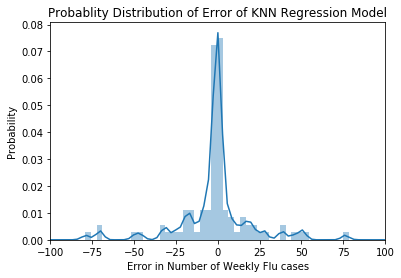

In [192]:
ax = sns.distplot(diff_df['rf_diff'], bins=100, label='Error in Number of Weekly Flu Cases')
mean_error = diff_df['rf_diff'].mean()
standard_error = diff_df['rf_diff'].std()
ax.set_xlim((-100,100))   
ax.set_title('Probablity Distribution of Error of KNN Regression Model')
ax.set_xlabel('Error in Number of Weekly Flu cases')
ax.set_ylabel('Probability')
print("The mean of this error distribution is:", mean_error)
print("The standard deviation of this error distribution is:", standard_error)